## Libraries & Data

For creating this chart, we will need to load the following libraries:

- [matplotlib](/matplotlib) for plotting the chart
- `geopandas` and `geoplot`: for spatial data plotting
- [pandas](/pandas) for loading the data
- [pypalettes](/color-palette-finder): for the color palette
- [highlight_text](/advanced-custom-annotations-matplotlib) for the annotations


In [1]:
# matplotlib tools
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# map libraries
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

# colors
from pypalettes import load_cmap

# annotations
from highlight_text import fig_text, ax_text

# data manipulation
import pandas as pd

# increase resolution
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Dataset

Let's start by loading shape data:


In [2]:
world = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/all_world.geojson')
world.head()

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Then we **load data** about the Asian population and surfaces


In [3]:
# get asian population dataset
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/asia_population.csv'
url = '../../static/data/asia.csv'
asia = pd.read_csv(url)
asia.head()

,Country,Total Population,Surface Area (sq. km)
0,Russia,1.444444e+08,17098250.0
1,China,1.425671e+09,9600013.0
2,India,1.428628e+09,3287259.0
3,Kazakhstan,1.960663e+07,2724902.0
4,Saudi Arabia,3.694702e+07,2149690.0


Once we have our 2 datasets, we can **merge** them and create `pop_norm_surface` column as a measure of population density:


In [4]:
# merge the datasets together
data = world.merge(asia, how='right', left_on='name', right_on='Country')

# filter the data
data = data[['Country', 'geometry', 'Total Population', 'Surface Area (sq. km)']]
data = data[~data['Country'].isin(['Russia', 'Bangladesh', 'Lebanon'])]
data.dropna(inplace=True)
data['pop_norm_surface'] = data['Total Population'] / data['Surface Area (sq. km)']

# display first rows
data.columns = ['Country', 'geometry', 'pop', 'surfaces', 'pop_norm_surface']
data.head()

,Country,geometry,pop,surfaces,pop_norm_surface
1,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.425671e+09,9600013.0,148.507231
2,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",1.428628e+09,3287259.0,434.595407
3,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",1.960663e+07,2724902.0,7.195354
4,Saudi Arabia,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",3.694702e+07,2149690.0,17.187141
5,Indonesia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",2.775341e+08,1916862.0,144.785656


## Simple map of Asia


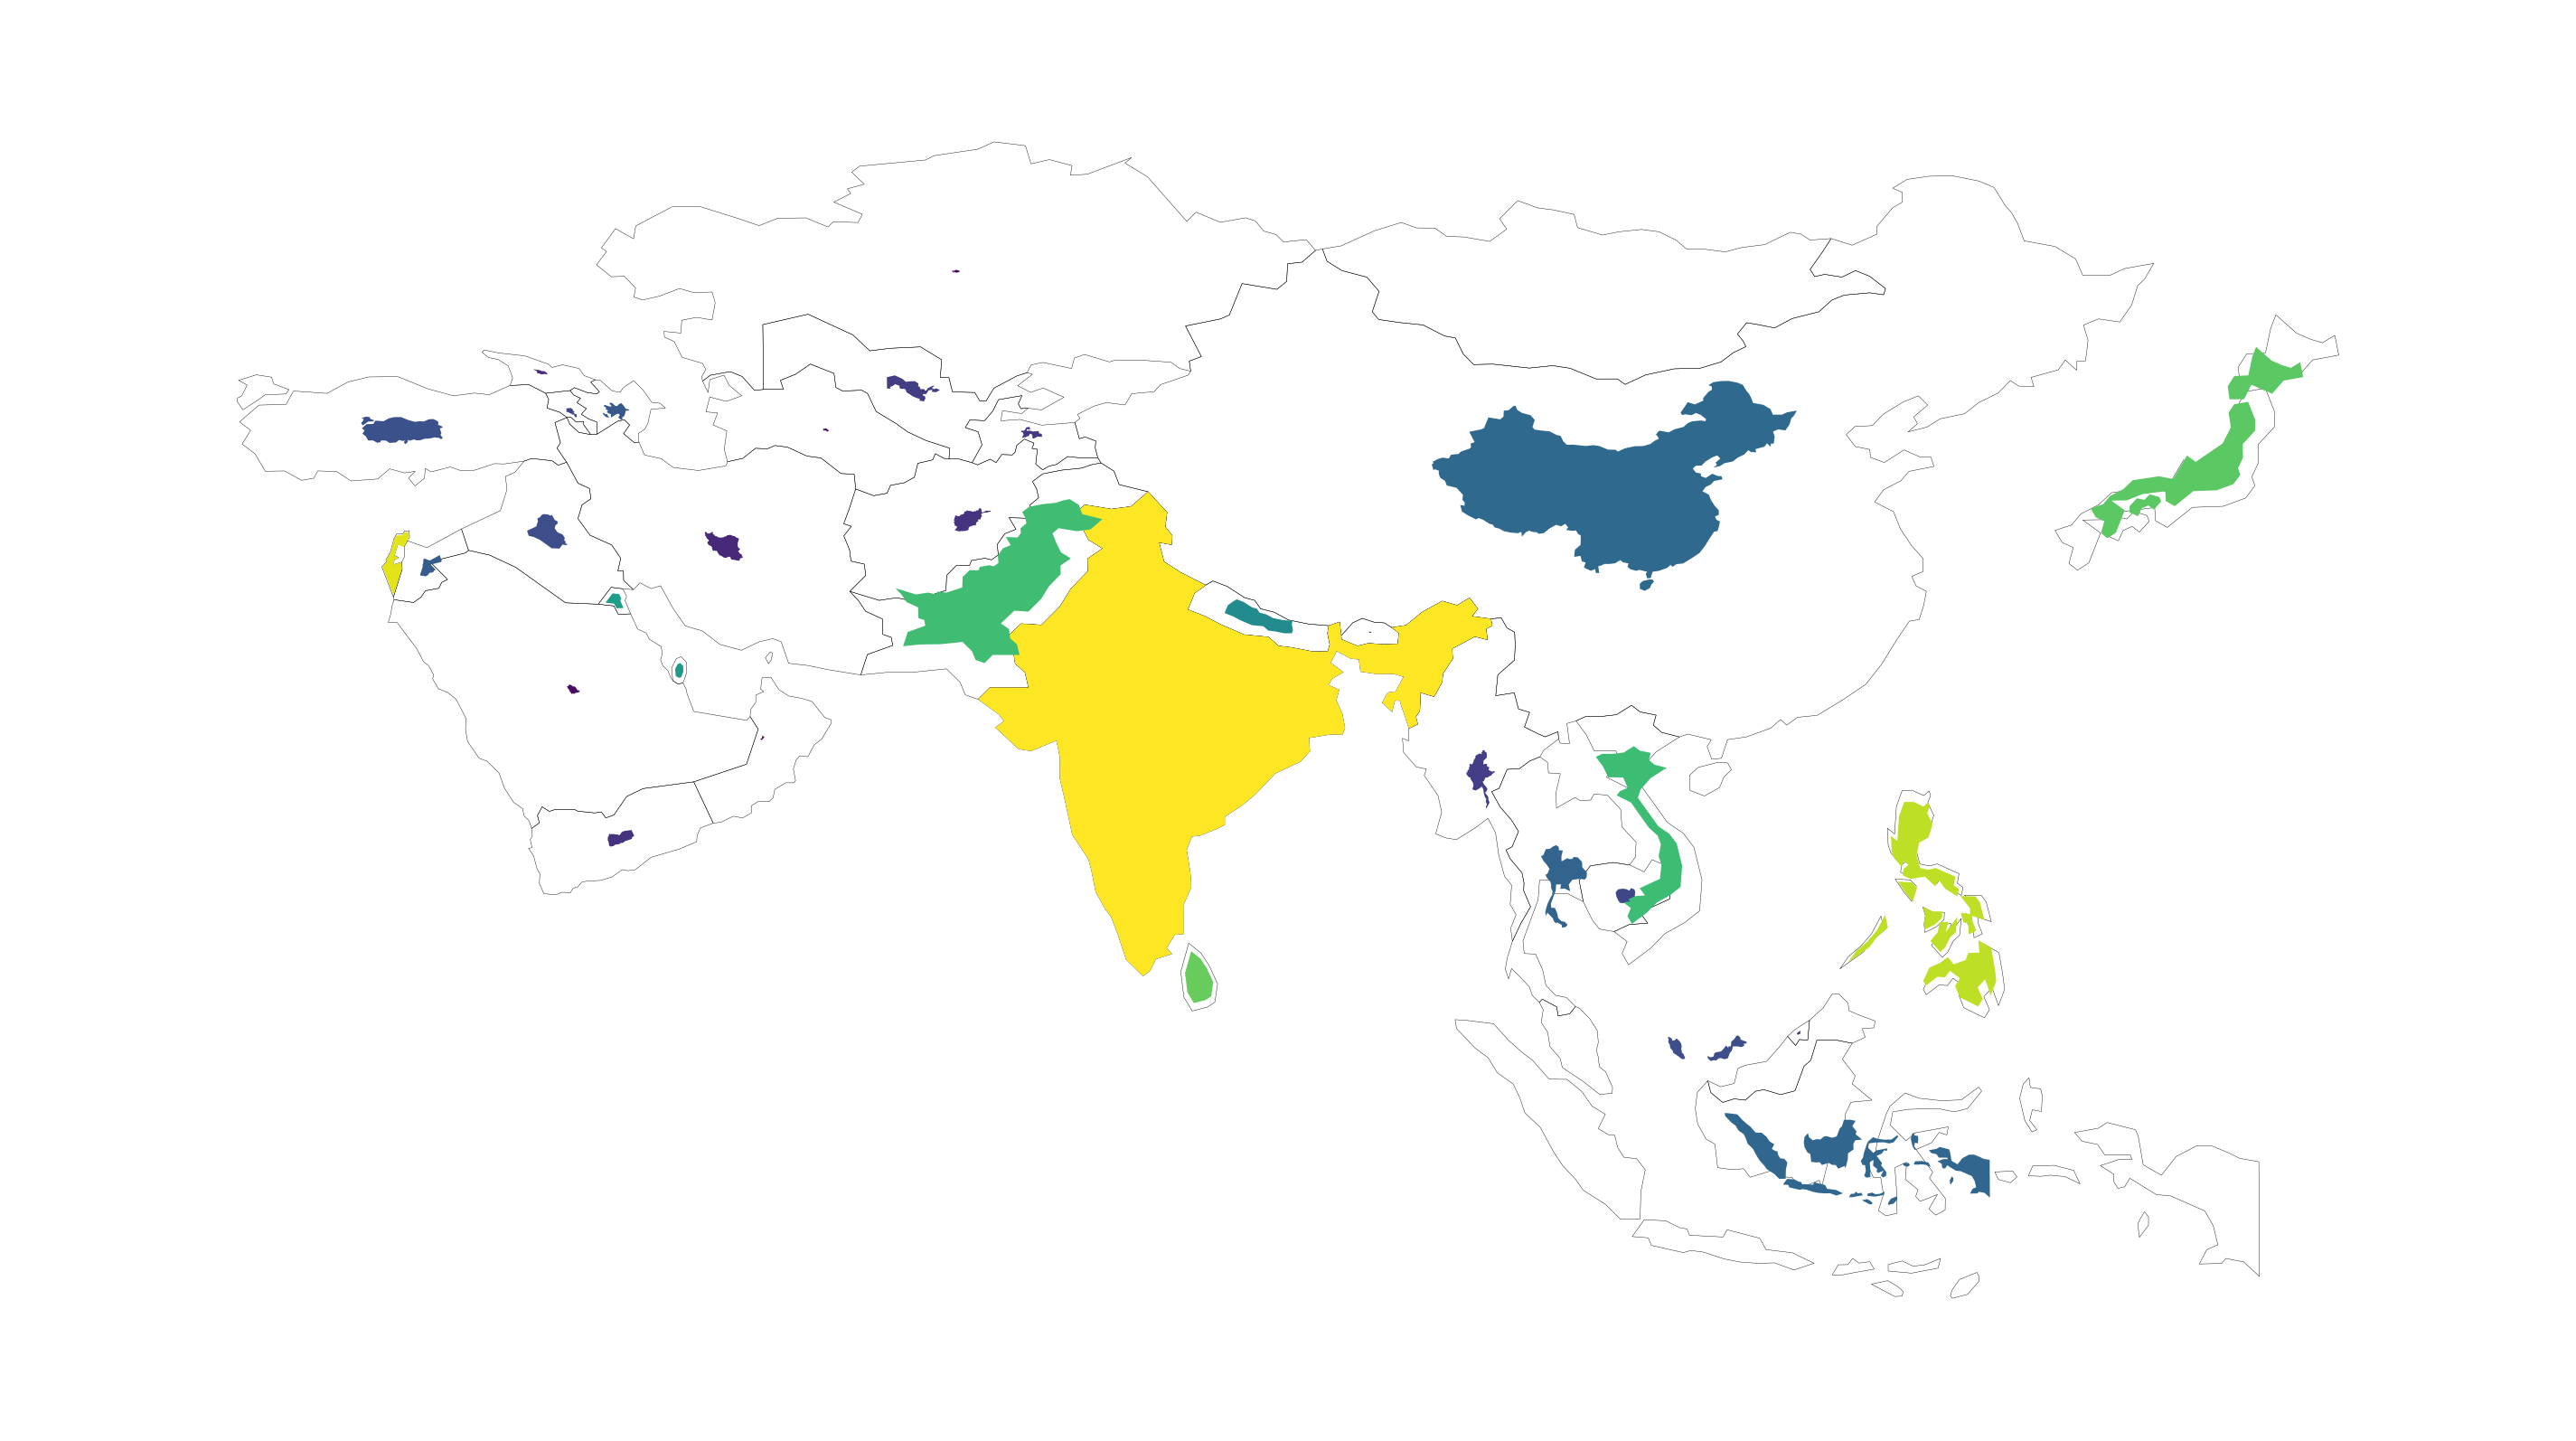

In [5]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection=gcrs.PlateCarree())

gplt.cartogram(
   data, projection=gcrs.PlateCarree(),
   scale='pop_norm_surface', hue='pop_norm_surface', limits=(0,1),
   ax=ax
)
gplt.polyplot(data, edgecolor='black', linewidth=0.1, ax=ax)
plt.show()

## Custom colors


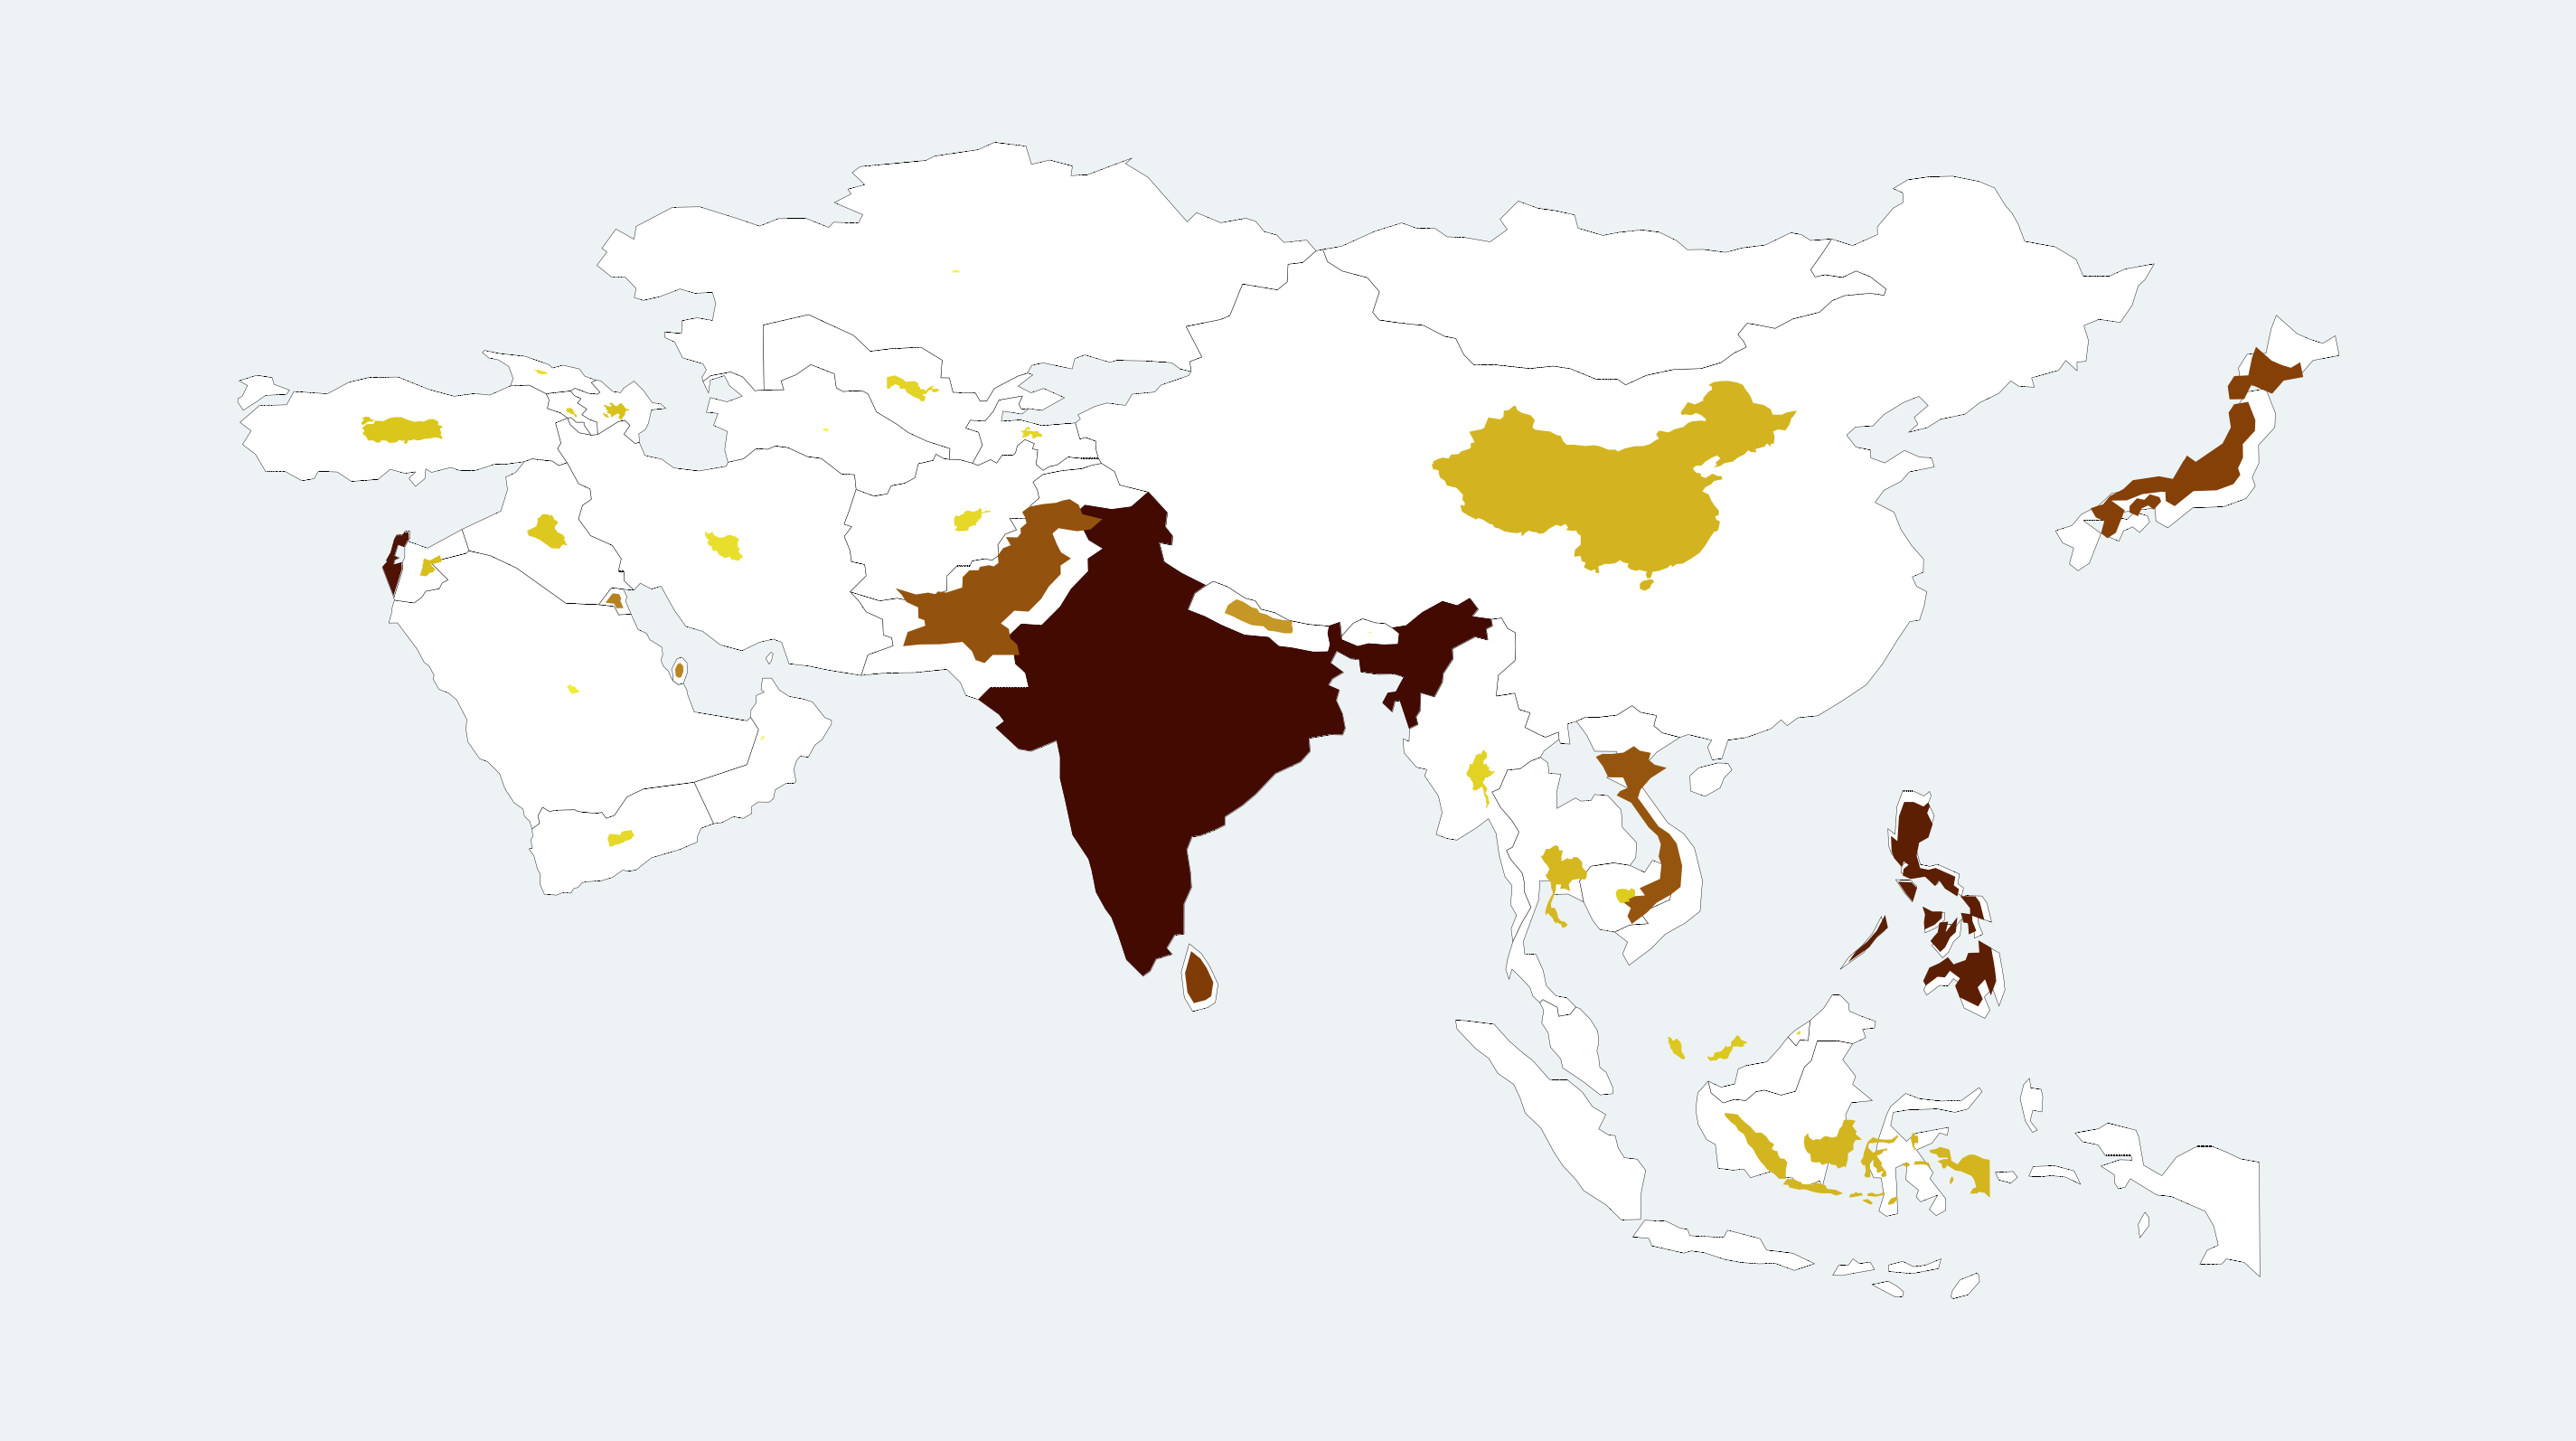

In [6]:
# colors
cmap = load_cmap("Antennarius_multiocellatus", type='continuous', reverse=True)
background_color = '#edf2f4'
text_color = '#14213d'
map_color = 'white'

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection=gcrs.PlateCarree())
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

gplt.cartogram(
   data, projection=gcrs.PlateCarree(), cmap=cmap,
   scale='pop_norm_surface', hue='pop_norm_surface', limits=(0,1),
   ax=ax
)
gplt.polyplot(data, facecolor=map_color, edgecolor='black', linewidth=0.1, ax=ax)
plt.show()

## Title, subtitle and source


In [7]:
# load the fonts
personal_path = '/Users/josephbarbier/Library/Fonts/' # change this to your own path
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

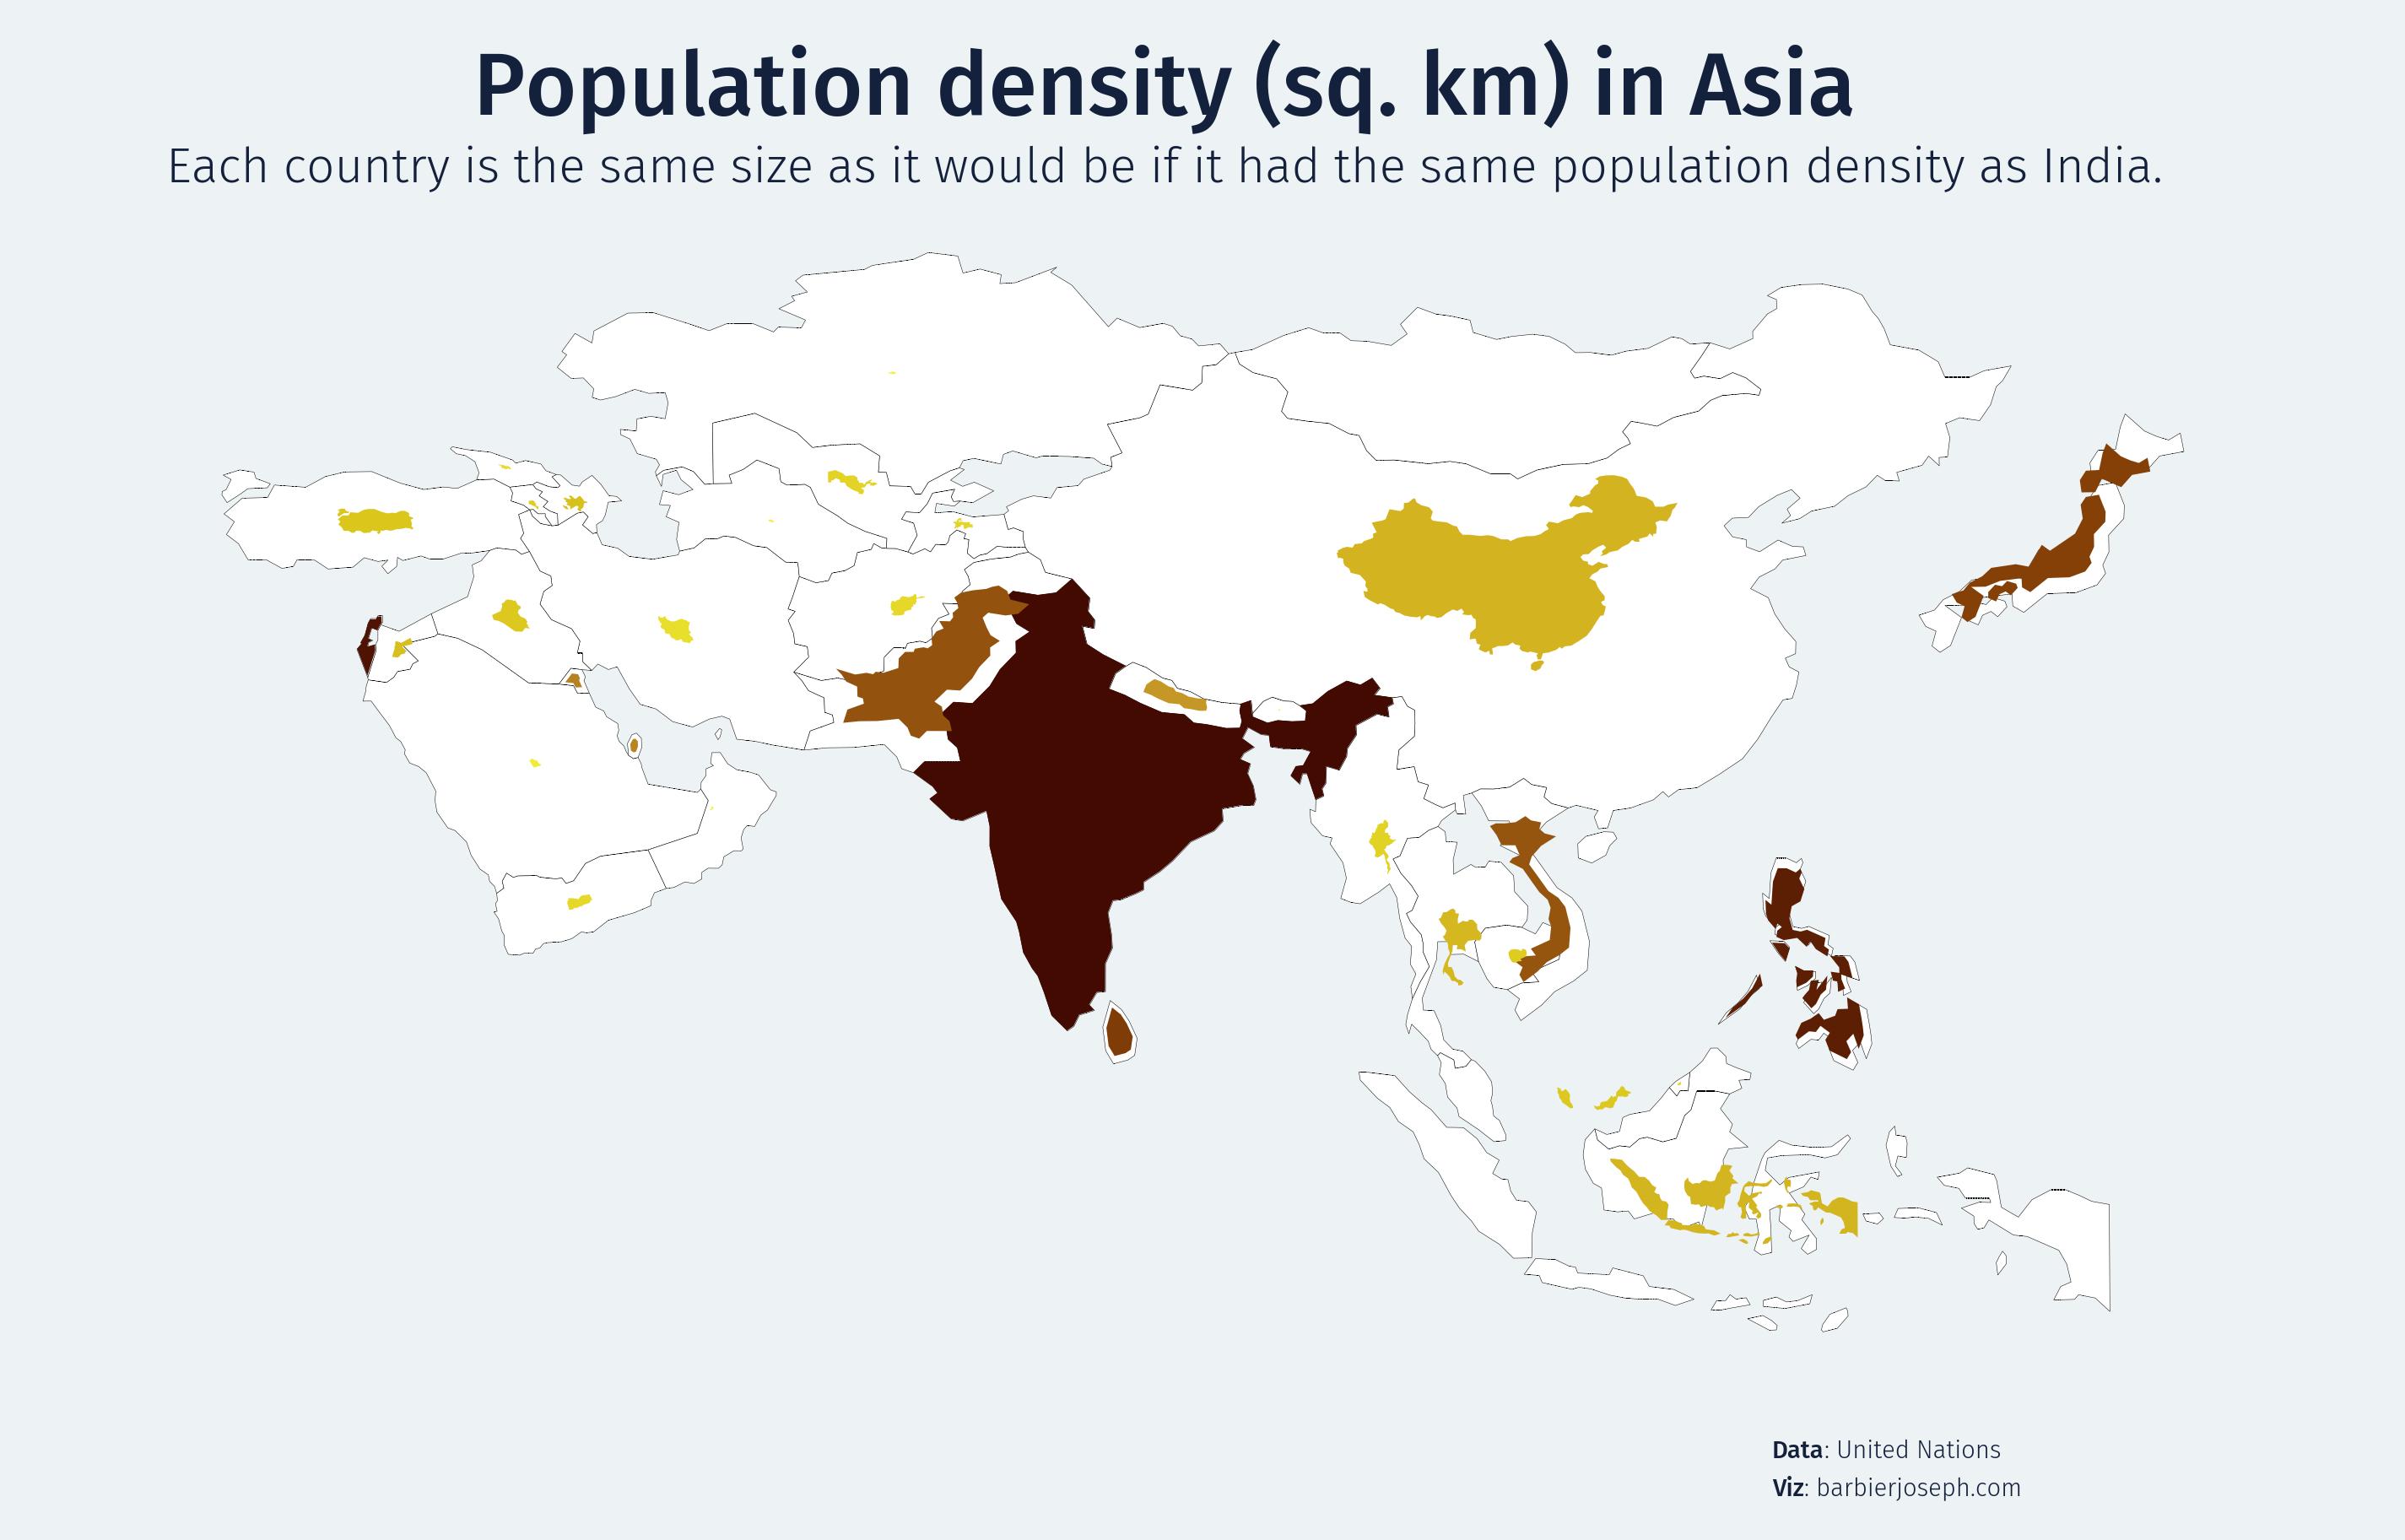

In [15]:
# colors
cmap = load_cmap("Antennarius_multiocellatus", type='continuous', reverse=True)
background_color = '#edf2f4'
text_color = '#14213d'
map_color = 'white'

# initiate figure and axes
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection=gcrs.PlateCarree())
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# create the cartogram and background map
gplt.cartogram(
   data, projection=gcrs.PlateCarree(), cmap=cmap,
   scale='pop_norm_surface', hue='pop_norm_surface', limits=(0,1),
   ax=ax
)
gplt.polyplot(data, facecolor=map_color, edgecolor='black', linewidth=0.12, ax=ax)

fig_text( # title
   x=0.5, y=0.92, s="Population density (sq. km) in Asia",
   fontsize=25, ha='center', font=other_bold_font, color=text_color
)
fig_text( # subtitle
   x=0.5, y=0.86, s="Each country is the same size as it would be if it had the same population density as India.",
   fontsize=14, ha='center', font=other_font, color=text_color
)
fig_text( # credit and source
   x=0.7, y=0.13, s="<Data>: United Nations\n<Viz>: barbierjoseph.com",
   font=other_font, fontsize=7, color=text_color,
   highlight_textprops=[{'font': other_bold_font}, {'font': other_bold_font}]
)

plt.show()

## Annotations of countries


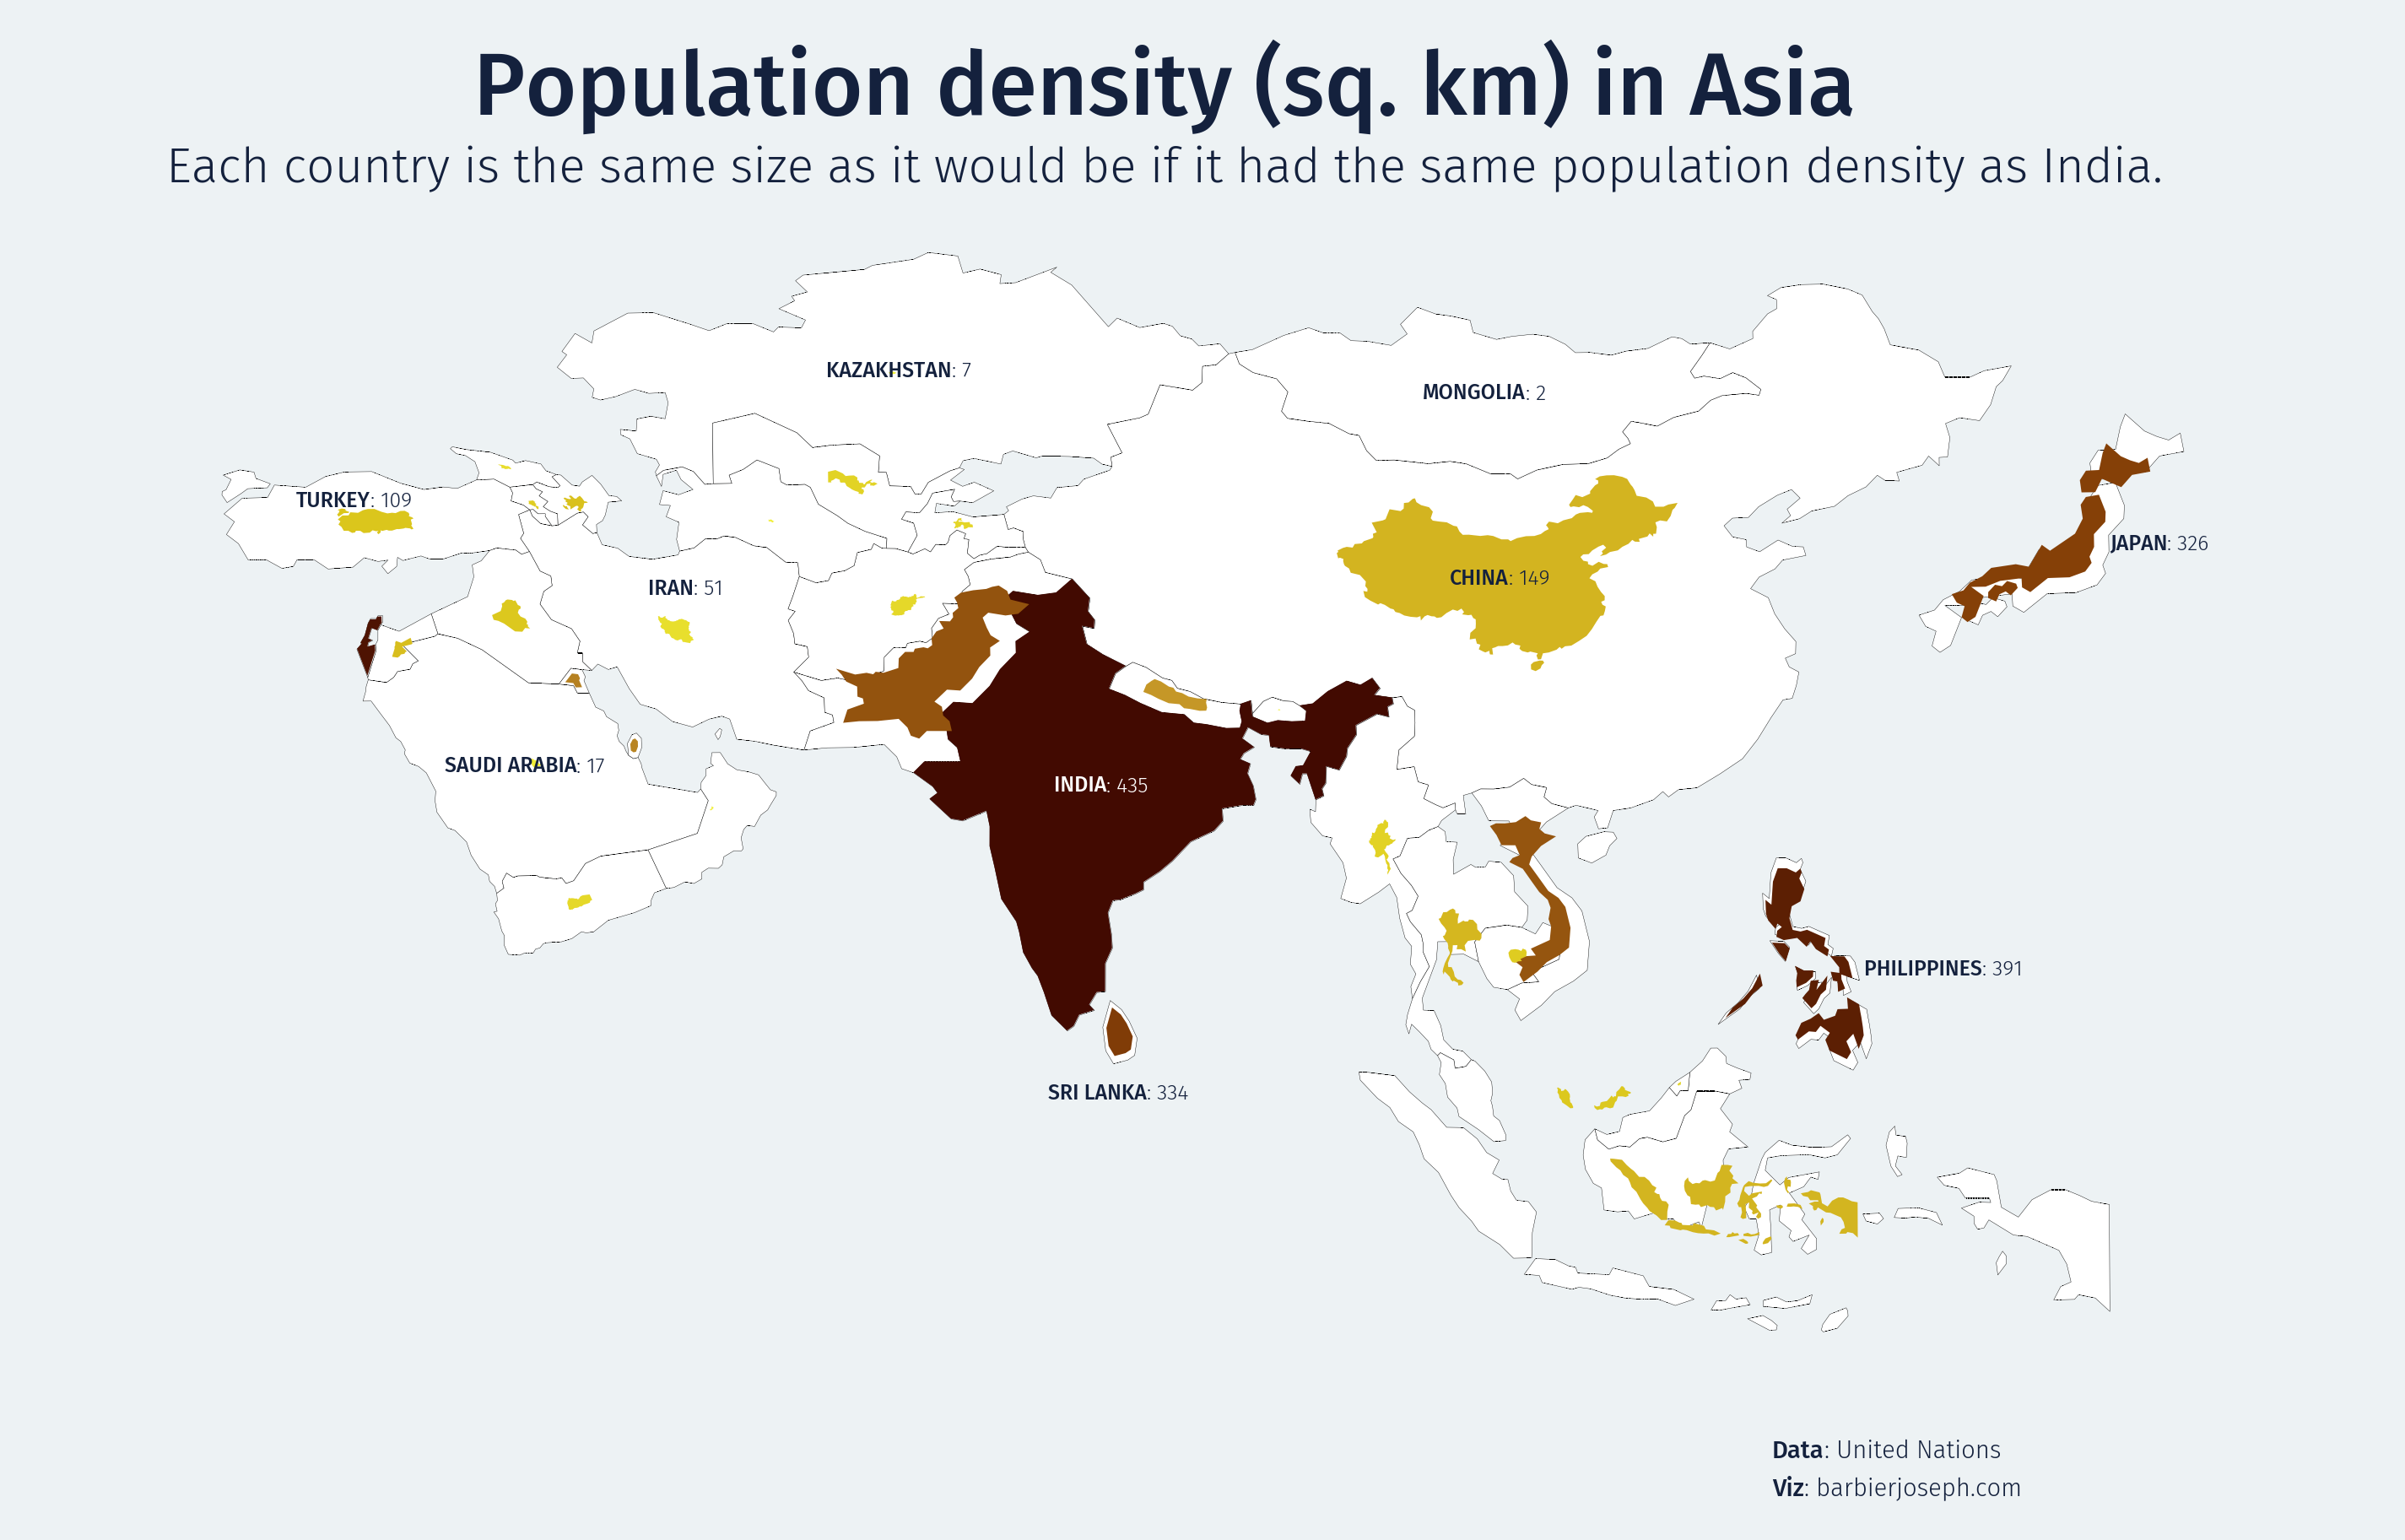

In [9]:
# adjustement mapping for label positions
adjustments = {
   'Japan': (6, 0),
   'Philippines': (8, 0),
   'Sri Lanka': (0, -3.5),
   'Turkey': (-1, 1.2),
   'China': (0, -1),
   'Iran': (0, 2.4)
}

# load the fonts
personal_path = '/Users/josephbarbier/Library/Fonts/' # change this to your own path
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# colors
cmap = load_cmap("Antennarius_multiocellatus", type='continuous', reverse=True)
background_color = '#edf2f4'
text_color = '#14213d'
map_color = 'white'

# create a figure object
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection=gcrs.PlateCarree())
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Generate the cartogram
gplt.cartogram(
   data, projection=gcrs.PlateCarree(), cmap=cmap,
   scale='pop_norm_surface', hue='pop_norm_surface', limits=(0,1),
   ax=ax
)
gplt.polyplot(data, facecolor=map_color, edgecolor='black', linewidth=0.1, ax=ax)

# get the centroids
import warnings ; warnings.filterwarnings("ignore") # mask warning about geometry attribute
data_projected = data.to_crs(epsg=4326)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
countries = ['China', 'India', 'Japan', 'Mongolia', 'Kazakhstan', 'Turkey', 'Philippines', 'Sri Lanka', 'Saudi Arabia', 'Iran']

# annotate each country
for country in countries:   
   centroid = data.loc[data['Country'] == country, 'centroid'].values[0]
   x, y = centroid.coords[0]
   x, y = (x + adjustments[country][0], y + adjustments[country][1]) if country in adjustments else (x, y)
   value = data.loc[data['Country'] == country, 'pop_norm_surface'].values[0]
   color = 'white' if country=='India' else text_color
   ax_text(
      x=x, y=y, s=f"<{country.upper()}>: {value:.0f}", fontsize=6, font=other_font, color=color,
      ha='center', va='center', ax=ax, highlight_textprops=[{'font': other_bold_font}]
   )

fig_text( # title
   x=0.5, y=0.92, s="Population density (sq. km) in Asia",
   fontsize=25, ha='center', font=other_bold_font, color=text_color
)
fig_text( # subtitle
   x=0.5, y=0.86, s="Each country is the same size as it would be if it had the same population density as India.",
   fontsize=14, ha='center', font=other_font, color=text_color
)
fig_text( # credit and source
   x=0.7, y=0.13, s="<Data>: United Nations\n<Viz>: barbierjoseph.com",
   font=other_font, fontsize=7, color=text_color,
   highlight_textprops=[{'font': other_bold_font}, {'font': other_bold_font}]
)

# save and show the plot
plt.savefig('../../static/graph/592-non-contiguous-cartogram-in-python.png', dpi=300)
plt.show()

## Going further

You might be interested in:

- create annotations with [different styles](/advanced-custom-annotations-matplotlib)
- how to create [rounded arrows](/how-to-create-and-custom-arrows-matplotlib)
- customize [fonts in matplotlib](/custom-fonts-in-matplotlib)
- how to [manage subplots](/194-split-the-graphic-window-with-subplot)
